In [ ]:
# !pip install sklearn_pandas
# pip install graphviz

CRISP-ML(Q):
    1.a. Business problem: Significant proportion of customers are defaulting on loan
        i. Business Objectives: Minimize Loan Defaulters
        ii. Business Constraints: Maximize the Profits
        Success Criteria:
        i. Business success criteria: Reduce the loan defaulters by 10%
        ii. ML success criteria: Achieve an accuracy of over 92%
        iii. Economic success criteria: Save the bank with > 1.2 MUSD
    1.b. Data Collection: Bank -> 1000 customers, 17 variables (16 Inputs and 1 Ouput)
    2. Data Preprocessing - Cleansing & EDA / Descriptive Analytics
    3. Model Building - Hyperparameters tuning & imbalanced/unbalanced 
    4. Evaluation
    5. Model Deployment (Flask)
    6. Monitoring & Maintenance (Prediction results to the database - MS SQL)

In [ ]:
# pip install sklearn_pandas
# pip install graphviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import joblib
import pickle

In [2]:
data = pd.read_csv(r"C:\Users\Bharani Kumar\Desktop\Data Science using Python & R\Version 2 slides\Decision Tree\DT_flask_final\DT_flask_final\credit.csv") 

In [3]:
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67.0,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22.0,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49.0,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45.0,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53.0,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31.0,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40.0,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38.0,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23.0,none,other,1,skilled,1,yes,yes


In [4]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   checking_balance      1000 non-null   object 
 1   months_loan_duration  1000 non-null   int64  
 2   credit_history        1000 non-null   object 
 3   purpose               1000 non-null   object 
 4   amount                1000 non-null   int64  
 5   savings_balance       1000 non-null   object 
 6   employment_duration   1000 non-null   object 
 7   percent_of_income     1000 non-null   int64  
 8   years_at_residence    1000 non-null   int64  
 9   age                   997 non-null    float64
 10  other_credit          1000 non-null   object 
 11  housing               1000 non-null   object 
 12  existing_loans_count  1000 non-null   int64  
 13  job                   1000 non-null   object 
 14  dependents            1000 non-null   int64  
 15  phone                 

In [6]:
# Checking for Null values

data.isnull().sum()


checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     3
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

### AutoEDA

In [7]:
# sweetviz
##########

# pip install sweetviz
import sweetviz
my_report = sweetviz.analyze([data, "data"])

my_report.show_html('Report1.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [9]:
data = data.drop(["phone"], axis = 1) # Unwanted columns are removed.

In [10]:
# Target variable categories

data['default'].unique()


array(['no', 'yes'], dtype=object)

In [11]:
data['default'].value_counts()


no     700
yes    300
Name: default, dtype: int64

In [12]:
# Data split into Input and Output

X = data.iloc[:, :15] # Predictors 

In [13]:
y = data['default'] # Target 

#### Separating Numeric and Non-Numeric columns

In [14]:
numeric_features = X.select_dtypes(exclude = ['object']).columns

In [15]:
numeric_features

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents'],
      dtype='object')

In [16]:
categorical_features = X.select_dtypes(include=['object']).columns

In [17]:
categorical_features

Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job'],
      dtype='object')

#### Imputation to handle missing values

In [18]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])

In [19]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])

In [20]:
imputation = preprocessor.fit(X)

#### Save the imputation model using joblib

In [21]:
joblib.dump(imputation, 'meanimpute')

['meanimpute']

In [22]:
num_data = pd.DataFrame(imputation.transform(X), columns = numeric_features)

num_data

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0


### Outlier Analysis

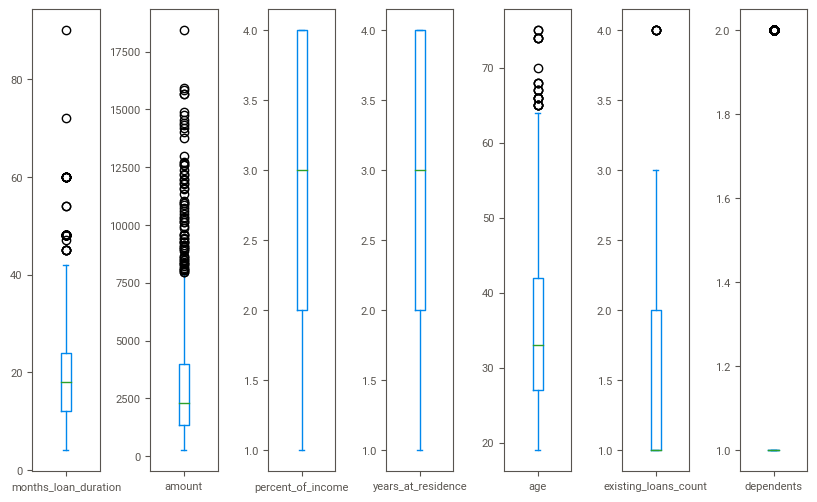

In [23]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

num_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

#### Outlier analysis: Columns 'months_loan_duration', 'amount', and 'age' are continuous, hence outliers are treated

In [24]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['months_loan_duration', 'amount','age'])

In [25]:
clean = winsor.fit(num_data[['months_loan_duration', 'amount', 'age']])

In [26]:
# Save the winsorizer model 
joblib.dump(clean, 'winsor')

['winsor']

In [27]:
num_data[['months_loan_duration', 'amount', 'age']] = clean.transform(num_data[['months_loan_duration', 'amount', 'age']])

num_data

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,6.0,1169.0,4.0,4.0,64.5,2.0,1.0
1,42.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0
998,42.0,1845.0,4.0,4.0,23.0,1.0,1.0


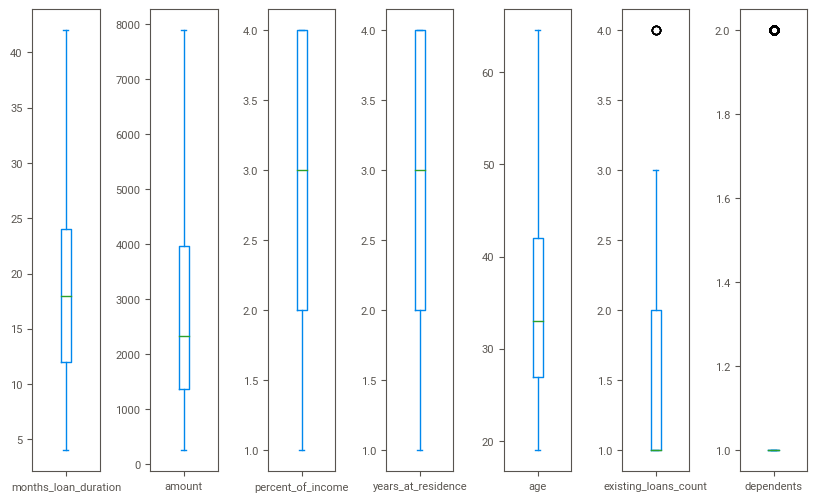

In [28]:
num_data.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [29]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [30]:
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)])

In [31]:
scale = scale_columntransfer.fit(num_data)

In [32]:
# Save the MinMaxScaler Model
joblib.dump(scale, 'minmax')

['minmax']

In [33]:
scaled_data = pd.DataFrame(scale.transform(num_data))
scaled_data

,0,1,2,3,4,5,6
0,0.052632,0.120408,1.000000,1.000000,1.000000,0.333333,0.0
1,1.000000,0.746950,0.333333,0.333333,0.065934,0.000000,0.0
2,0.210526,0.241864,0.333333,0.666667,0.659341,0.000000,1.0
3,1.000000,0.999951,0.333333,1.000000,0.571429,0.000000,1.0
4,0.526316,0.605316,0.666667,1.000000,0.747253,0.333333,1.0
...,...,...,...,...,...,...,...
995,0.210526,0.194697,0.666667,1.000000,0.263736,0.000000,0.0
996,0.684211,0.472592,1.000000,1.000000,0.461538,0.000000,0.0
997,0.210526,0.072586,1.000000,1.000000,0.417582,0.000000,0.0
998,1.000000,0.208978,1.000000,1.000000,0.087912,0.000000,0.0


### Encoding - One Hot Encoder to convert Categorical data to Numeric values

In [34]:
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [35]:
preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

In [36]:
clean = preprocess_pipeline.fit(X)

In [37]:
# Save the Encoding model
joblib.dump(clean,'encoding')

['encoding']

In [38]:
encode_data = pd.DataFrame(clean.transform(X).todense())

In [39]:
encode_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1, ignore_index = True) 
# ignore_index = True arranges the column id's in sequence post the concatination

In [41]:
clean_data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.052632,0.120408,1.000000,1.000000,1.000000,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.000000,0.746950,0.333333,0.333333,0.065934,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.210526,0.241864,0.333333,0.666667,0.659341,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.999951,0.333333,1.000000,0.571429,0.000000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.526316,0.605316,0.666667,1.000000,0.747253,0.333333,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.210526,0.194697,0.666667,1.000000,0.263736,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.684211,0.472592,1.000000,1.000000,0.461538,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,0.210526,0.072586,1.000000,1.000000,0.417582,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,1.000000,0.208978,1.000000,1.000000,0.087912,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# Split data into train and test with Stratified sample technique

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, y, test_size = 0.2, stratify = y, random_state = 0) 

In [ ]:
# sklearn.model_selection.StratifiedKFold(n_splits = 5, *, shuffle = False, random_state = None)

In [43]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 800)
print("\n")
print(Y_test.value_counts()/ 200)

no     0.7
yes    0.3
Name: default, dtype: float64


no     0.7
yes    0.3
Name: default, dtype: float64


### Decision Tree Model

In [44]:
model = DT(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
# Prediction on Test Data

preds = model.predict(X_test)

In [46]:
preds

array(['no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes'

In [47]:
# Accuracy

print(accuracy_score(Y_test, preds))

0.7


In [48]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,no,yes
Actual,,
no,115,25
yes,35,25


### Hyperparameter Optimization

In [49]:
# create a dictionary of all hyperparameters to be experimented
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [50]:
# Train
dtree_gscv.fit(clean_data, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [51]:
# The best set of parameter values
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [52]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_

In [53]:
DT_best

DecisionTreeClassifier(max_depth=3)

In [54]:
# Prediction on Test Data

preds1 = DT_best.predict(X_test)
preds1

array(['no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'

In [55]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,no,yes
Actual,,
no,115,25
yes,35,25


In [56]:
# Accuracy

print(accuracy_score(Y_test, preds))

0.7


In [57]:
import os
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [58]:
predictors = list(clean_data.columns)
type(predictors)

list

In [59]:
dot_data = tree.export_graphviz(DT_best, filled = True, 
                                rounded = True,
                                feature_names = predictors,
                                class_names = ['Default', "Not Default"],
                                out_file = None)

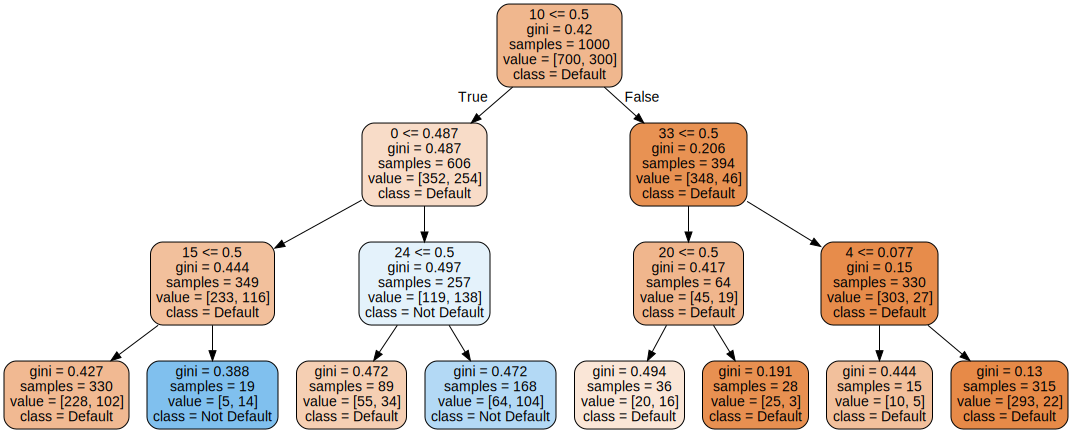

In [60]:
graph = graphviz.Source(dot_data)
graph

In [61]:
# Prediction on Train Data

preds_train = DT_best.predict(X_train)
preds_train

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'n

In [62]:
# Confusion Matrix
pd.crosstab(Y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions,no,yes
Actual,,
no,502,58
yes,146,94


In [63]:
# Accuracy

print(accuracy_score(Y_train, preds_train))

0.745


### Save the Best Model with pickel library

In [64]:
pickle.dump(DT_best, open('DT.pkl', 'wb'))

# Model Training with Cross Validation

In [65]:
from sklearn.model_selection import cross_validate


def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y_train)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'no': 0, 'yes': 1}
Label Encoded Target Variable
[0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 

In [67]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_result = cross_validation(DT_best, X_train, encoded_y, 5)

In [68]:
decision_tree_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.726562,73.4375,0.654545,0.717117,0.187500,0.228125,0.291498,0.328157,0.68125,69.125,0.363636,0.373512,0.083333,0.133333,0.135593,0.186972
1,0.732812,73.4375,0.818182,0.717117,0.140625,0.228125,0.240000,0.328157,0.70000,69.125,0.500000,0.373512,0.083333,0.133333,0.142857,0.186972
2,0.742188,73.4375,0.701493,0.717117,0.244792,0.228125,0.362934,0.328157,0.69375,69.125,0.470588,0.373512,0.166667,0.133333,0.246154,0.186972
3,0.739062,73.4375,0.837838,0.717117,0.161458,0.228125,0.270742,0.328157,0.66875,69.125,0.000000,0.373512,0.000000,0.133333,0.000000,0.186972
4,0.731250,73.4375,0.573529,0.717117,0.406250,0.228125,0.475610,0.328157,0.71250,69.125,0.533333,0.373512,0.333333,0.133333,0.410256,0.186972


In [69]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

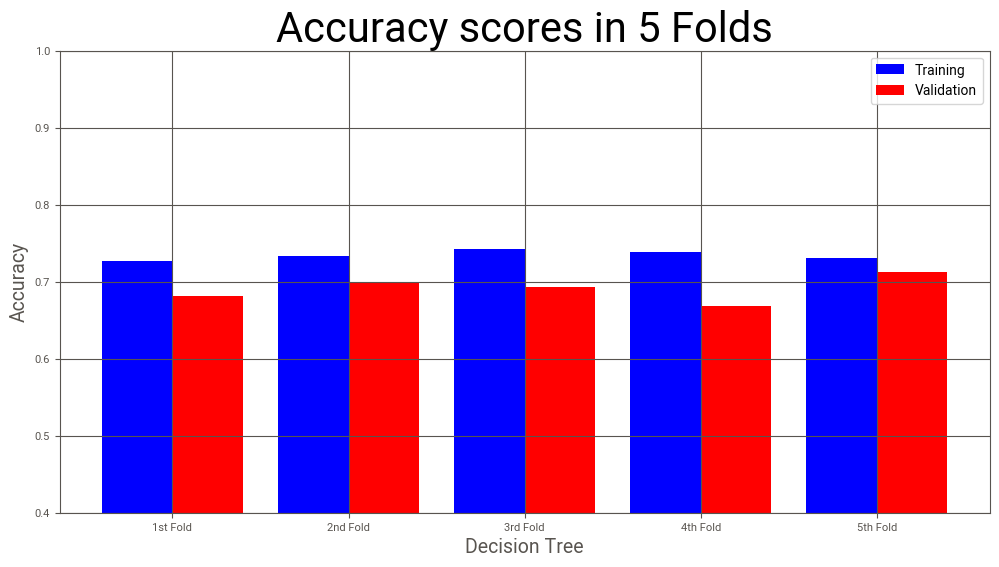

In [70]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])